# Automobile

Import libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

Import dataset

In [166]:
df = pd.read_csv("cars.csv")

In [167]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


Observation :

Dataset have continues,descrete and string values.

Continues columns : MPG | Disp | Hp | Wt | Acc

Multivalued descrete columns : Cyl | Acc | Yr

String colums : Car_name

In [168]:
df.shape

(398, 9)

Dataset contains 398 data with 9 attributes

In [169]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Observation :

Minimum and maximum value of targeted column 'mpg' is respectively 9.0 and 46.60

Minimum and maximum value of column 'cyl' is respectively 3.0 and 8.00

Minimum and maximum value of column 'disp' is respectively 68.0 and 455.00

Minimum and maximum value of column 'wt' is respectively 1613.0 and 5140.00

Minimum and maximum value of column 'acc' is respectively 8.0 and 24.80

Minimum and maximum value of column 'yr' is respectively 70.0 and 82.00

Minimum and maximum value of column 'origin' is respectively 1.0 and 3.00

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Onservation : df.info() in ourdataset is represent that there are no any null vales in our dataset.

In [171]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['car'] = df['car_name'].apply(lambda x : re.search(r'^\w+',x).group(0))
    df=df.drop('car_name',axis=1)
    
    return df

Extract only companies name of car by using lambda function.

Link : https://regex101.com/

In [172]:
df = preprocess_inputs(df)

Update the dataframe 

In [173]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


In [174]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In 'hp' column there is one value ('?') which is not int so we have to change it. 

In [175]:
df = df[df.hp != '?']
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Remove that value

In [176]:
df.hp = df.hp.astype('float')
df.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
car        object
dtype: object

Check that incorrect value is changed or not 

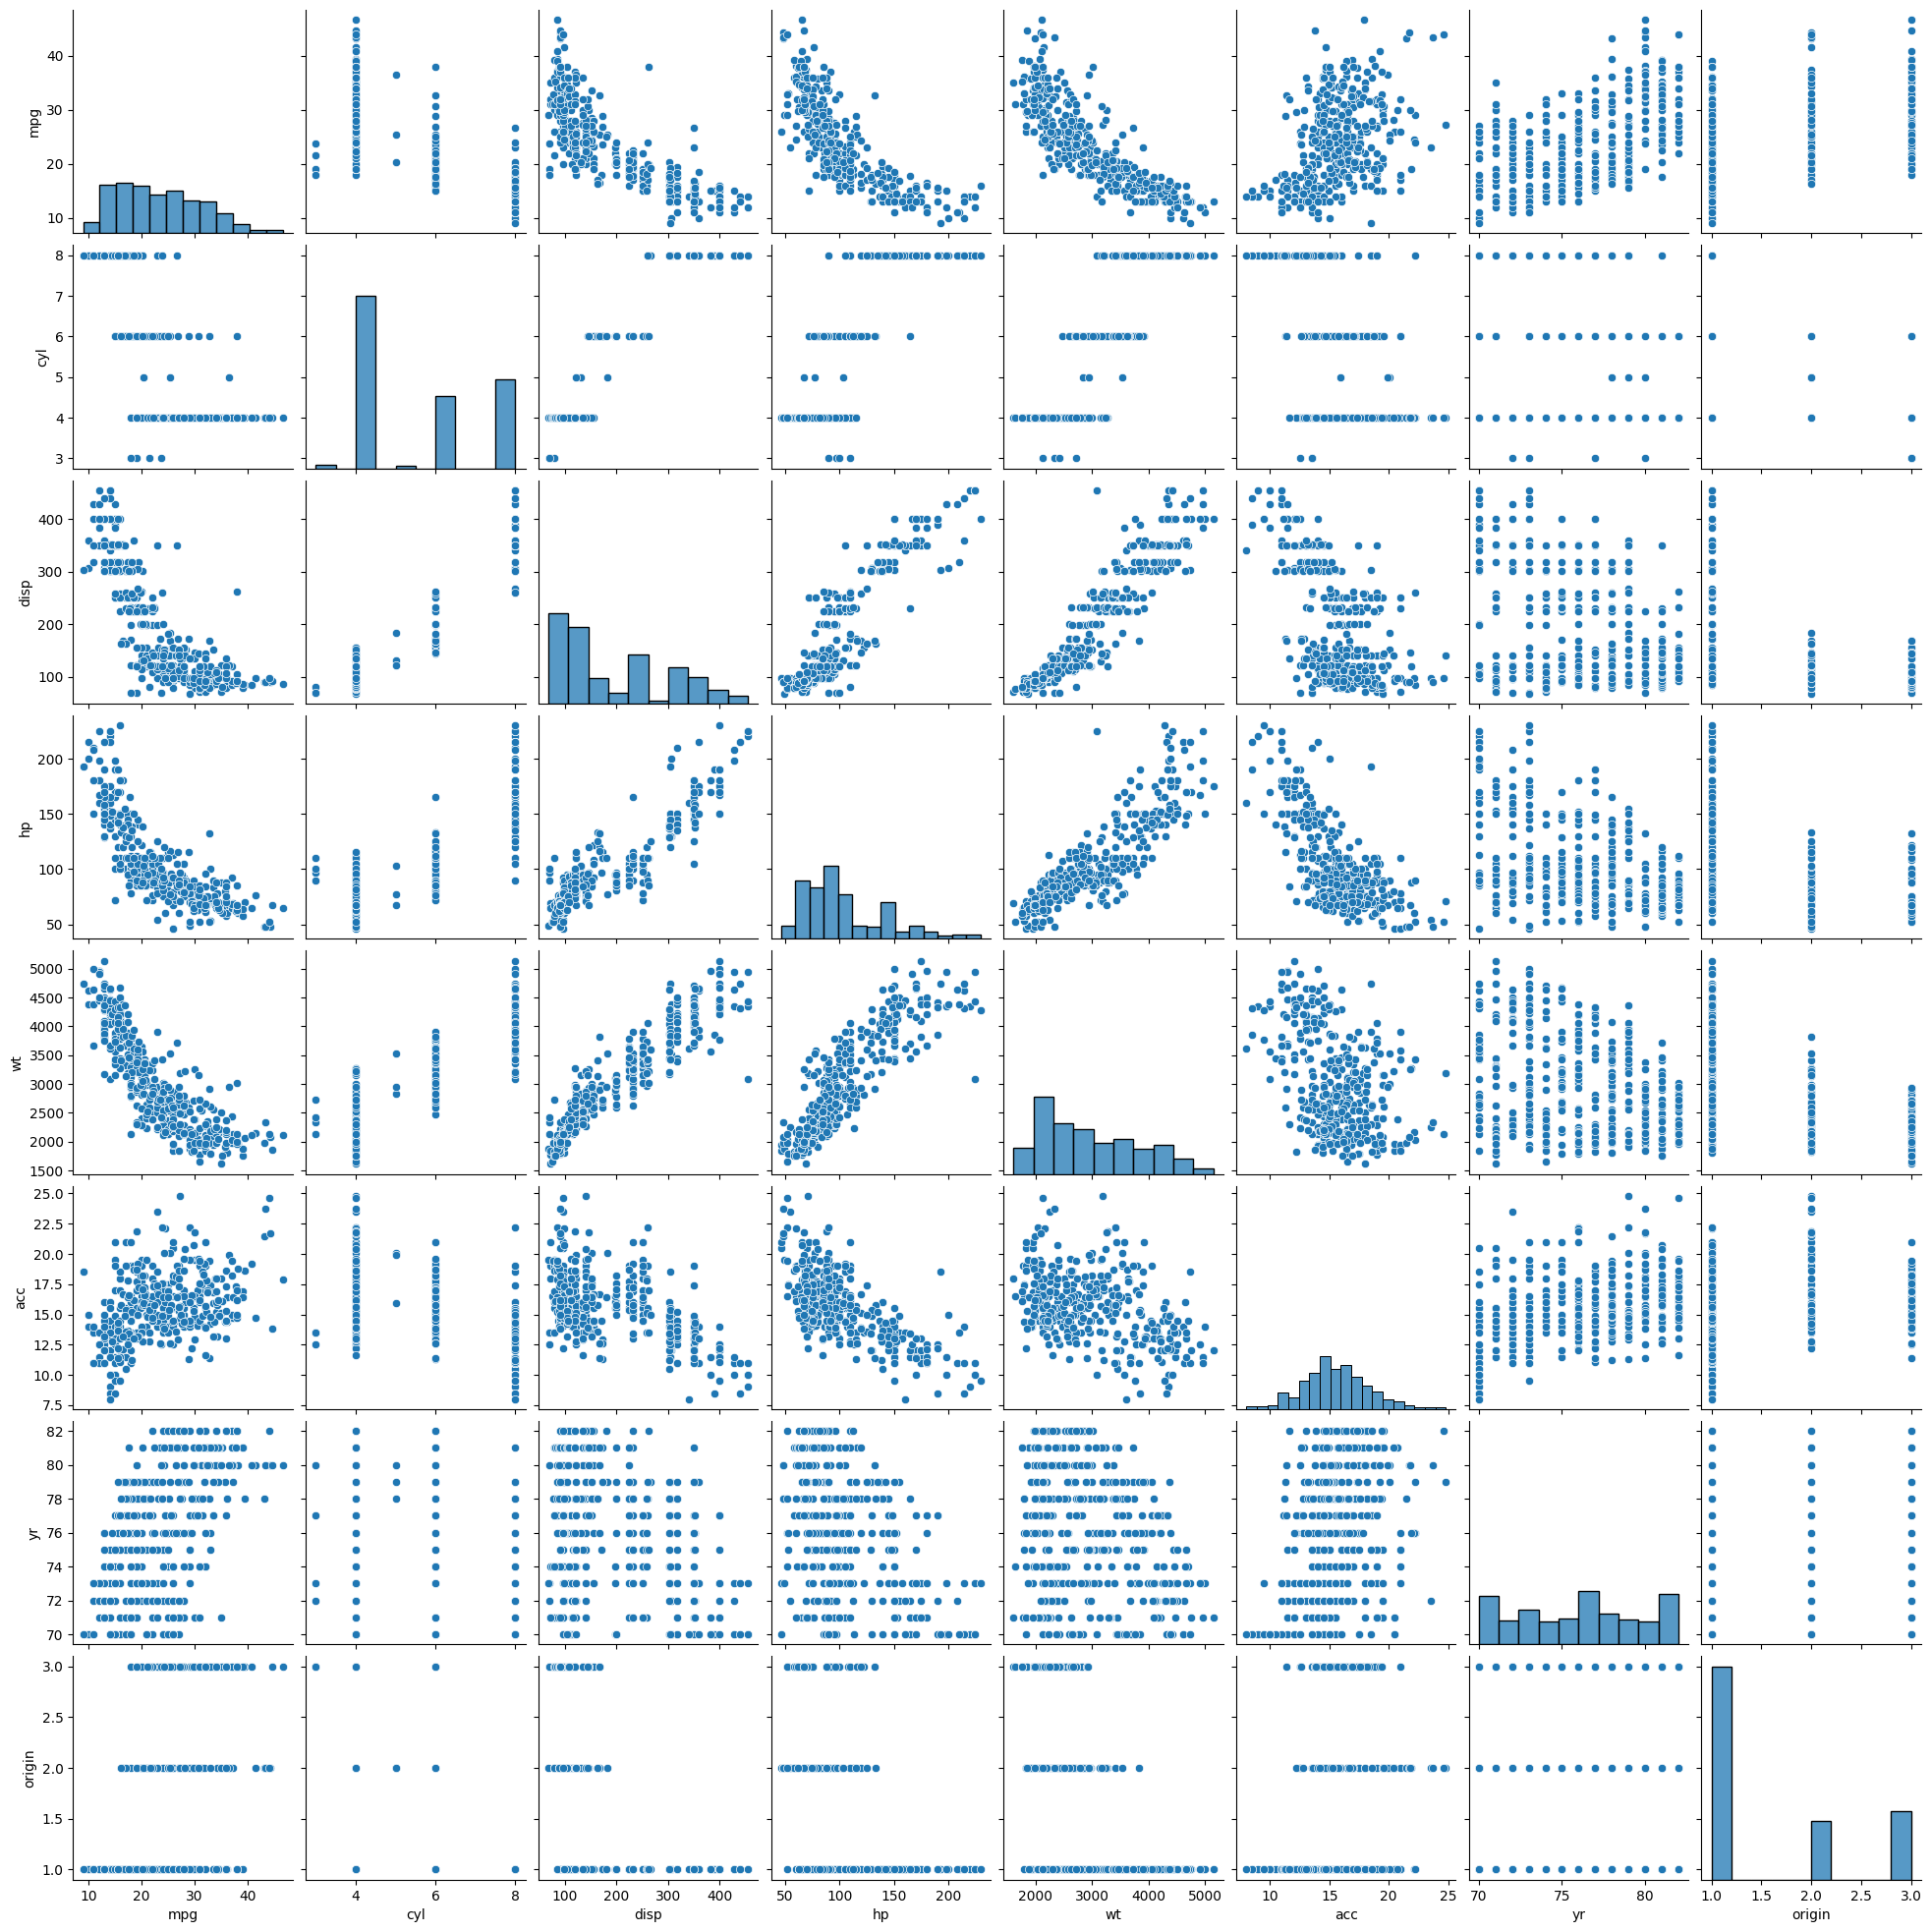

In [177]:
sns.pairplot(df)

<Axes: >

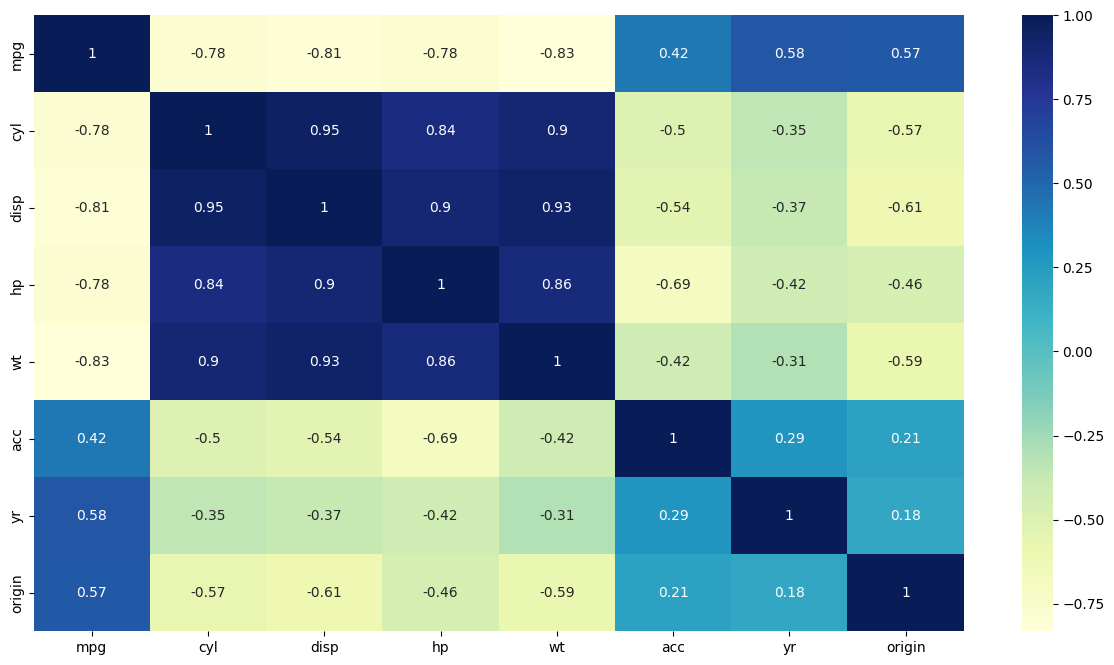

In [178]:
#df2 = df.drop(['car_name'], axis=1,inplace=False)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

According to heatmap column 'disp' and 'cyl' are correlated with each other.

## 2.  Data Visualization

#### Univariate Analysis

<Axes: xlabel='origin', ylabel='count'>

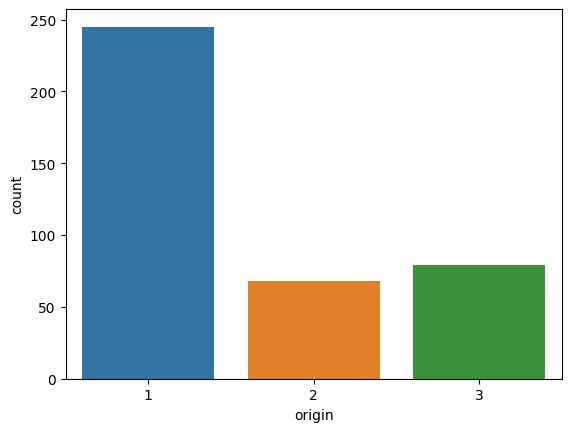

In [179]:
sns.countplot(x ='origin', data = df)

Observation :
    
More than 200 data belongs to 1 origin.

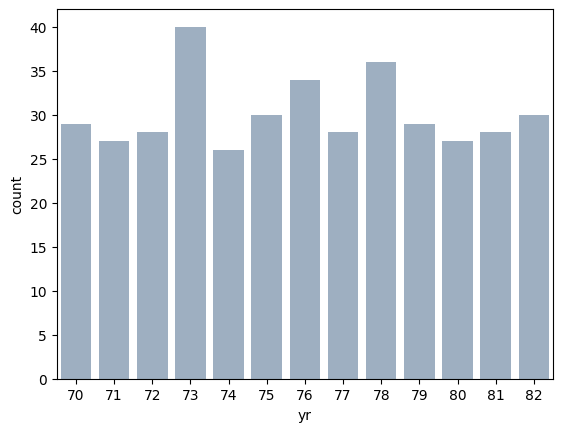

In [180]:
sns.countplot(x ='yr', data = df,color='#98AFC7');

Observation : 
    
Model years are distributed over 12 years, with 1970, 1976, 1982 more represented than others.

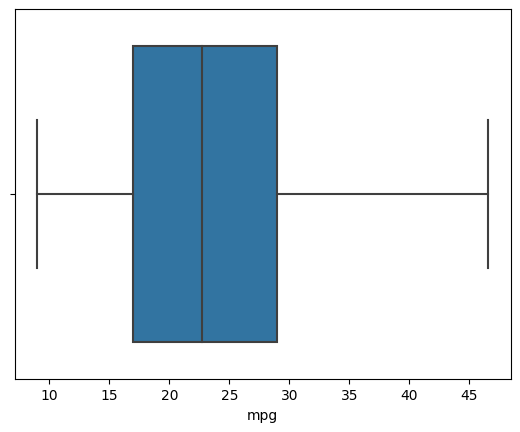

In [181]:
sns.boxplot(x= df.mpg);

No any outliers founded in "mpg" column.

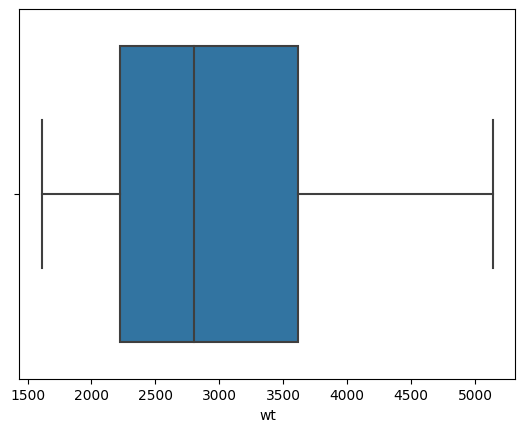

In [182]:
sns.boxplot(x= df.wt);

No any outliers founded in "wt" column.

<Axes: xlabel='cyl'>

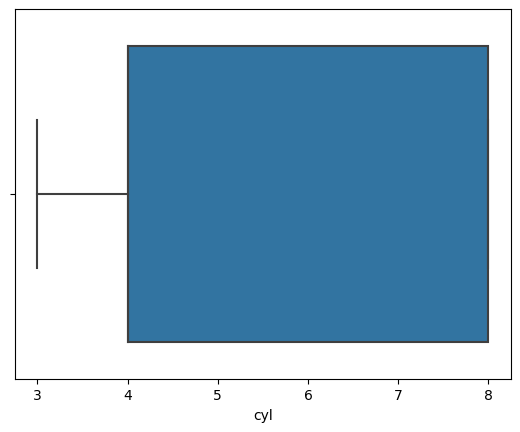

In [184]:
sns.boxplot(x= df.cyl)

No any outliers founded in "cyl" column.

### Bivariate analysis

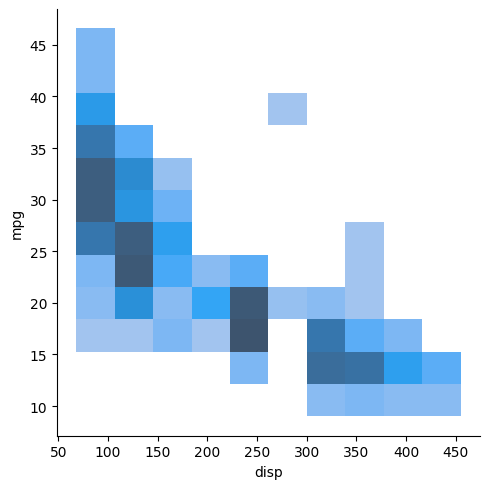

In [236]:
sns.displot(df,x='disp',y='mpg')

Observation :
    
Value of "mpg" is increasing as value of "disp" is decreasing.

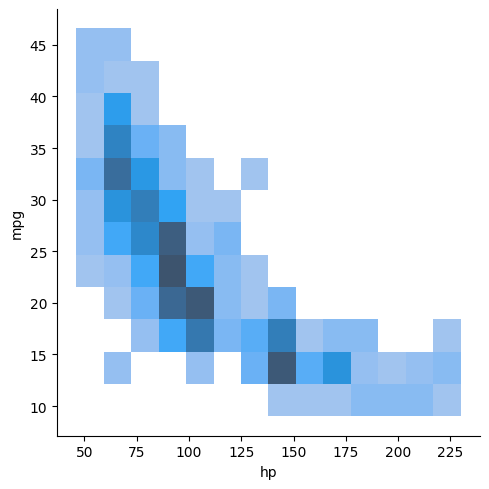

In [242]:
sns.displot(df,x='hp',y='mpg')

Observation :
    
Value of "mpg" is increasing as value of "hp" is decreasing.

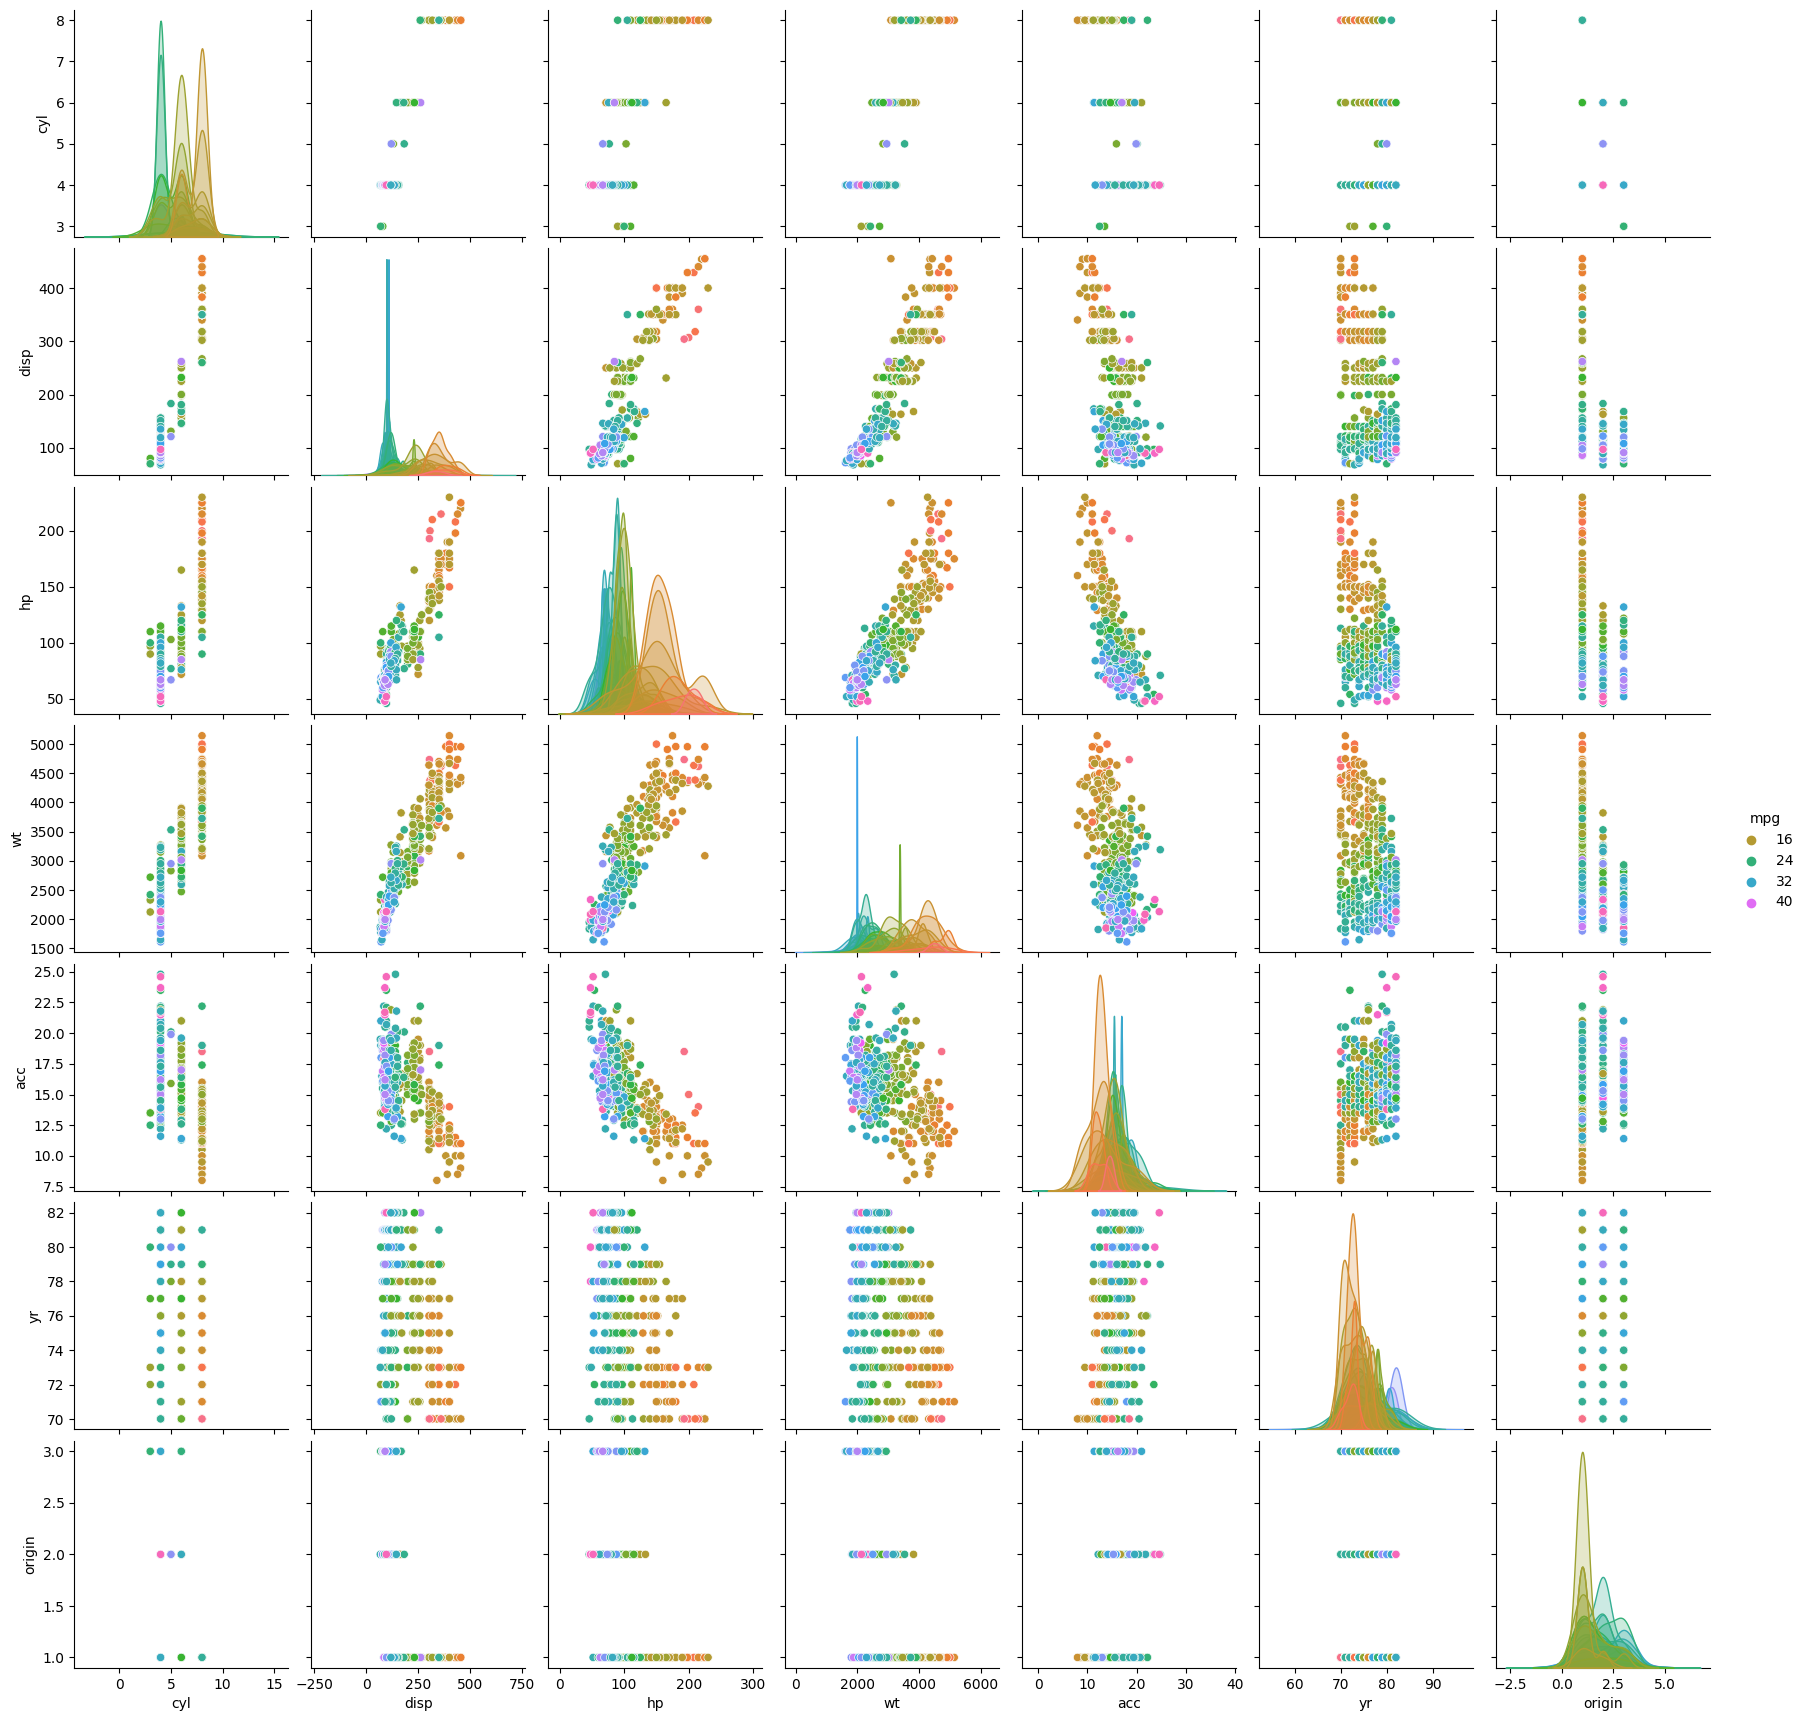

In [185]:
import warnings 
warnings.filterwarnings('ignore')

sns.pairplot(df, hue="mpg", palette="husl");

In [186]:
df = df.drop(["yr"],axis=1)

'yr' column may not have any relation with 'mpg' column drop it.

In [187]:
df = df.drop(["origin"],axis=1)

'origin' column may not have any relation with 'mpg' column drop it.

In [188]:
df = df.drop(["car"],axis=1)

'car' column may not have any relation with 'mpg' column drop it.

In [189]:
df

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


#### Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

In [190]:
#in order to treat data well we perform scaling here
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [240]:
X = StandardScaler()

In [192]:
scaled_df = X.fit_transform(df.iloc[:,1:6])

Take only first 5 columns which are needed to find number of clusters.

In [193]:
scaled_df

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [194]:
from sklearn.cluster import KMeans

#### Use KMeans clustering when you do not have a specific outcome variable that you are trying to predict.

In [195]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)

Initially take number of cluster = 2

In [196]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2)

#### Within Cluster Sum of Squares

In [197]:
k_means.inertia_

704.1504924555486

It is calculated by measuring the distance between each data point and its centroid

I = Σ miri2.

#### Use elbow method to find number of cluster

In [198]:
wss =[] 

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df.iloc[:,1:6])
    wss.append(KM.inertia_)
    
wss    

[286965522.2900765,
 72904981.10171555,
 33835143.84268032,
 18798231.82133879,
 13484228.31416059,
 10128273.005706048,
 7518151.083407645,
 5601420.180406591,
 4666053.106034778,
 3989589.4842771166]

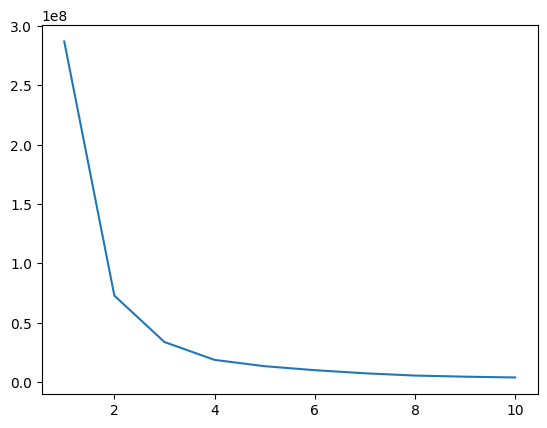

In [199]:
plt.plot(range(1,11), wss)

Obsercation :

According to graph there are 4 clusters in dataset

#### Use second technique Dendrogram to findnumber of clusters

In [218]:
from scipy.cluster.hierarchy import dendrogram, linkage

Here linkage shows the distance between the centroids of two clusters.

In [217]:
link_method = linkage(df.iloc[:,1:6], method = 'average')

Average-linkage is where the distance between each pair of observations in each cluster are added up and divided by the number of pairs to get an average inter-cluster distance

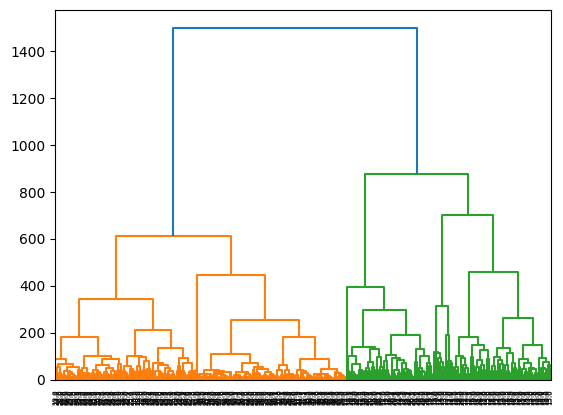

In [202]:
labelList = np.array(df.mpg)
dend = dendrogram(link_method,labels = labelList.tolist())

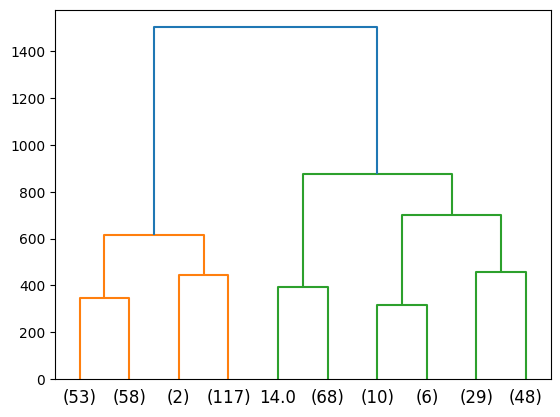

In [220]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList.tolist() 
                 )

Truncation is used to condense the dendrogram.

Observation : There are total 2 clusters in dendrogram

In [204]:
from scipy.cluster.hierarchy import fcluster

fcluster can be used to flatten the dendrogram, obtaining as a result an assignation of the original data points to single clusters

In [205]:
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,

maxclust− The criterion maxclust will find a minimum threshold value r. It assures that the cophenetic distance between any two original observations in the same flat clusters will always be less than or equal to r and t

In [223]:
df['No. of clusters'] = clusters
df

,mpg,cyl,disp,hp,wt,acc,clusters,No. of clusters
0,18.0,8,307.0,130.0,3504,12.0,2,2
1,15.0,8,350.0,165.0,3693,11.5,2,2
2,18.0,8,318.0,150.0,3436,11.0,2,2
3,16.0,8,304.0,150.0,3433,12.0,2,2
4,17.0,8,302.0,140.0,3449,10.5,2,2
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1,1
394,44.0,4,97.0,52.0,2130,24.6,1,1
395,32.0,4,135.0,84.0,2295,11.6,1,1
396,28.0,4,120.0,79.0,2625,18.6,1,1


Add No. of clusters column in the dataset

In [224]:
df.clusters.value_counts().sort_index()

1    230
2    162
Name: clusters, dtype: int64

Find no ofdatain no of clusters

In [225]:
df_cluster1 =  df[df['clusters']== 1]
df_cluster2 =  df[df['clusters']== 2]

Add both number of cluster in dataframe

### Train-Test split the dataset

In [243]:
X = df_cluster1.iloc[:,1:9]
y = df_cluster1['clusters']

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)  
print(regressor.coef_)

1.0
[0. 0. 0. 0. 0. 0. 0.]


Take 30% data as testing data and 70% data as training data.

In [245]:
X = df_cluster2.iloc[:,1:9]
y = df_cluster2['clusters']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regressor = LinearRegression()
regressor.fit(X_train,y_train) 
print(regressor.intercept_)  
print(regressor.coef_)
regressor.score(X_test, y_test)

2.0
[0. 0. 0. 0. 0. 0. 0.]


1.0

Take 30% data as testing data and 70% data as training data.

### KMeans clustering : Clustering is used to identify groups of similar objects in datasets with two or more variable quantities. 

In KMeans clustering we use Elbow method to find number of clusters

In this dataset according to Dendrogram there are 4 clusters. 

### Hirarchical clustering : This procedure attempts to identify relatively homogeneous groups of cases (or variables) based on selected characteristics, using an algorithm that starts with each case (or variable) in a separate cluster and combines clusters until only one is left.

In KMeans clustering we use Dendrogram to find number of clusters

In this dataset according to Dendrogram there are 4 clusters. 

### We used Linear regresssion model on 2 clusters which was founded by dendrogram.

For 1 cluster the cofficent was 1.00

For 2 cluster the cofficent was 2.00